## K-Mean Clustering

In [1]:
import numpy as np

x = np.array([
    [2,5],
    [3,6],
    [2,4],
    [5,7],
    [7,2],
    [8,3],
    [9,4],
    [8,4],
    [7,3]], dtype = float)

k = 2

In [2]:
centroids = np.array([[2, 5], [7, 2]], dtype=float)

### 단계 2: 할당

- 각 데이터 항목을 centroid와 얼마나 멀리 있는지 계산하여, 클러스터에 할당한다.

- __거리 계산__

- norm() 함수의 default는 L2라서 생략할 수 있고, Euclidian distance와 동일하다.

In [3]:
def normDist(x1, x2):
    return np.linalg.norm(x1 - x2)

In [4]:
for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]


In [5]:
minDist = np.inf
for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))
    # pick the closest centroid
    if distJ0 < minDist:
        minDist = distJ0
        minIndex = j
print (".....Assigning {} to {}th centroid by {:.3f}".format(x[0], minIndex, minDist))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]
.....Assigning [2. 5.] to 0th centroid by 0.000


In [7]:
clusterAssigned = np.zeros(shape = (x.shape[0],2), dtype = float)
print (clusterAssigned)

row, c = x.shape
for i in range(row):
    minDist = np.inf
    minIndex = -1
    
    for j in range(k):
        distJ1 = normDist(centroids[j], x[i])
        if distJ1 < minDist:
            minDist = distJ1
            minIndex = j
    print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
    clusterAssigned[i] = [minIndex, minDist]   #-----changed

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000


### 단계 3: 갱신

- 구한 점들을 가지고 새로운 centroids로 update한다.

In [8]:
x[clusterAssigned[:, 0] == 0]

array([[2., 5.],
       [3., 6.],
       [2., 4.],
       [5., 7.]])

In [9]:
x[clusterAssigned[:, 0] == 1]

array([[7., 2.],
       [8., 3.],
       [9., 4.],
       [8., 4.],
       [7., 3.]])

- 각 Centroids에 할당된 vector들의 평균을 새로운 Centroid로 한다.

In [18]:
x[clusterAssigned[:, 0] == k]

for cent in range(k):
    centroids[cent] = np.mean(x[clusterAssigned[:, 0] == cent], axis=0)

In [19]:
centroids

array([[3. , 5.5],
       [7.8, 3.2]])

## 단계 4: 종료

- 반복을 종료할 것인지 확인한다. 소점을 비교할 경우, 정밀도에 따라 동일한  값인지 아닌지 확인하기 어렵다.

- np.equal() 함수를 사용해서 중심점이 갱신되었는지 확인할 수 있다.

In [22]:
comparison = np.equal(centroids, centroids)
comparison.all()

True

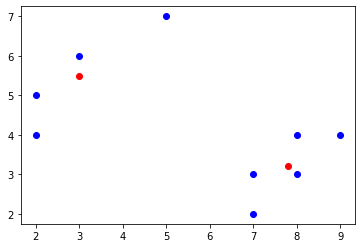

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], color='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red')

## K-Means Clustering Function

In [28]:
def k_meansClustering(x, k, centroids):
    nRow, nCol = x.shape
    
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    iter = 1
    clusterUpdated = True
    while clusterUpdated:
        print ("\n\n====== Iteration {} ======".format(iter))
        for i in range(nRow):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJ1 = normDist(centroids[j], x[i])
                if distJ1 < minDist:
                    minDist = distJ1
                    minIndex = j
            print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:, 0] == cent], axis=0)
            
        comparison = np.equal(centroids, _centroids)
        if comparison.all() == True:
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

In [29]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)
#x = np.array([[1, 2],[1, 4],[1, 0],[4, 2],[4, 4],[4, 0]])
k = 4
centroids = np.array([[2,5],[7,2]], dtype = float)
#centroids = np.array([[1,1],[4,1]], dtype = float)
centroids, clusterAssigned = k_meansClustering(x, k, centroids)
draw(x, centroids)



====== Iteration 1 ======


IndexError: index 2 is out of bounds for axis 0 with size 2

In [32]:
x

array([[2., 5.],
       [3., 6.],
       [2., 4.],
       [5., 7.],
       [7., 2.],
       [8., 3.],
       [9., 4.],
       [8., 4.],
       [7., 3.]])